In [32]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
df = pd.read_csv('CollegeRookieStatLog3.csv')
df.head()

,Unnamed: 0,Name,School,G,MP,FG,FGA,FG%,2P,2PA,...,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Pk,Tm,Year,Pos
0,0,Kenyon Martin,Cincinnati,116.0,23.7,4.4,7.5,0.586,4.4,7.5,...,6.65,7.4,1.9,1.1,1.7,12.0,1,NJN,2000,PF
1,1,Stromile Swift,LSU,50.0,26.6,5.1,9.0,0.560,4.9,8.4,...,5.84,3.6,0.4,0.8,1.0,4.9,2,VAN,2000,PF
2,2,Marcus Fizer,Iowa State,97.0,32.9,7.1,13.9,0.511,6.9,13.2,...,6.27,4.3,1.1,0.4,0.3,9.5,4,CHI,2000,PF
3,3,Mike Miller,Florida,65.0,26.7,4.5,9.2,0.483,3.3,5.8,...,7.07,4.0,1.7,0.6,0.2,11.9,5,ORL,2000,SF
4,4,DerMarr Johnson,Cincinnati,32.0,27.5,4.4,9.2,0.478,2.8,4.8,...,8.50,2.3,0.8,0.6,0.4,5.1,6,ATL,2000,SF


In [33]:
df = df.drop(['Unnamed: 0'], axis=1)

In [34]:
#positions = df.Pos.unique()
#po_dict = dict(zip(positions, range(len(positions))))
#df1 = df.replace({'Pos': po_dict})
teams = df.Tm.unique()
te_dict = dict(zip(teams, range(len(teams))))
df1 = df.replace({'Tm': te_dict})
df1.head()

,Name,School,G,MP,FG,FGA,FG%,2P,2PA,2P%,...,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Pk,Tm,Year,Pos
0,Kenyon Martin,Cincinnati,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,...,6.65,7.4,1.9,1.1,1.7,12.0,1,0,2000,PF
1,Stromile Swift,LSU,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,...,5.84,3.6,0.4,0.8,1.0,4.9,2,1,2000,PF
2,Marcus Fizer,Iowa State,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,...,6.27,4.3,1.1,0.4,0.3,9.5,4,2,2000,PF
3,Mike Miller,Florida,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,...,7.07,4.0,1.7,0.6,0.2,11.9,5,3,2000,SF
4,DerMarr Johnson,Cincinnati,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,...,8.50,2.3,0.8,0.6,0.4,5.1,6,4,2000,SF


In [35]:
df1['Fouls'] = df1['PF']
df1 = df1.drop(['PF'], axis=1)
dum1 = pd.get_dummies(df1['Pos'])
df1 = pd.concat([df1, dum1], axis=1)
df1 = df1.drop(['Pos'], axis=1)
df1.head()

,Name,School,G,MP,FG,FGA,FG%,2P,2PA,2P%,...,Pk,Tm,Year,Fouls,C,C-,PF,PG,SF,SG
0,Kenyon Martin,Cincinnati,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,...,1,0,2000,2.0,0,0,1,0,0,0
1,Stromile Swift,LSU,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,...,2,1,2000,2.6,0,0,1,0,0,0
2,Marcus Fizer,Iowa State,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,...,4,2,2000,1.9,0,0,1,0,0,0
3,Mike Miller,Florida,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,...,5,3,2000,1.9,0,0,0,0,1,0
4,DerMarr Johnson,Cincinnati,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,...,6,4,2000,2.0,0,0,0,0,1,0


In [36]:
df1['C'] = df1['C-'] + df1['C']
df1 = df1.drop(['C-'], axis=1)
df1.head()

,Name,School,G,MP,FG,FGA,FG%,2P,2PA,2P%,...,NBAPTS,Pk,Tm,Year,Fouls,C,PF,PG,SF,SG
0,Kenyon Martin,Cincinnati,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,...,12.0,1,0,2000,2.0,0,1,0,0,0
1,Stromile Swift,LSU,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,...,4.9,2,1,2000,2.6,0,1,0,0,0
2,Marcus Fizer,Iowa State,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,...,9.5,4,2,2000,1.9,0,1,0,0,0
3,Mike Miller,Florida,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,...,11.9,5,3,2000,1.9,0,0,0,1,0
4,DerMarr Johnson,Cincinnati,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,...,5.1,6,4,2000,2.0,0,0,0,1,0


In [37]:
schoolnames = df1.School.unique()
sc_dict = dict(zip(schoolnames, range(len(schoolnames))))
df1 = df1.replace({'School': sc_dict})
df1.head()

,Name,School,G,MP,FG,FGA,FG%,2P,2PA,2P%,...,NBAPTS,Pk,Tm,Year,Fouls,C,PF,PG,SF,SG
0,Kenyon Martin,0,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,...,12.0,1,0,2000,2.0,0,1,0,0,0
1,Stromile Swift,1,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,...,4.9,2,1,2000,2.6,0,1,0,0,0
2,Marcus Fizer,2,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,...,9.5,4,2,2000,1.9,0,1,0,0,0
3,Mike Miller,3,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,...,11.9,5,3,2000,1.9,0,0,0,1,0
4,DerMarr Johnson,0,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,...,5.1,6,4,2000,2.0,0,0,0,1,0


In [38]:
df1 = df1.drop(['School'], axis=1)
df1 = df1.set_index('Name')
df1.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,NBAPTS,Pk,Tm,Year,Fouls,C,PF,PG,SF,SG
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,0.0,0.1,...,12.0,1,0,2000,2.0,0,1,0,0,0
Stromile Swift,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,0.2,0.7,...,4.9,2,1,2000,2.6,0,1,0,0,0
Marcus Fizer,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,0.2,0.7,...,9.5,4,2,2000,1.9,0,1,0,0,0
Mike Miller,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,1.2,3.5,...,11.9,5,3,2000,1.9,0,0,0,1,0
DerMarr Johnson,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,1.6,4.4,...,5.1,6,4,2000,2.0,0,0,0,1,0


In [39]:
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
df1 = df1[[c for c in df1 if c not in cols_at_end] + [c for c in cols_at_end if c in df1]]
df1.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,C,PF,PG,SF,SG,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,0.0,0.1,...,0,1,0,0,0,7.4,1.9,1.1,1.7,12.0
Stromile Swift,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,0.2,0.7,...,0,1,0,0,0,3.6,0.4,0.8,1.0,4.9
Marcus Fizer,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,0.2,0.7,...,0,1,0,0,0,4.3,1.1,0.4,0.3,9.5
Mike Miller,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,1.2,3.5,...,0,0,0,1,0,4.0,1.7,0.6,0.2,11.9
DerMarr Johnson,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,1.6,4.4,...,0,0,0,1,0,2.3,0.8,0.6,0.4,5.1


In [40]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
dum = ['NBATRB','NBAAST','NBASTL','NBABLK']
for du in dum:
    cols.remove(du)

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#cols = df1.columns
sc2 = StandardScaler()
for col in cols:
    df1[[col]] = sc2.fit_transform(df1[[col]])
#df1['NBAPTS'] = sc2.fit_transform(df1['NBAPTS'])
sc3 = StandardScaler()
df1[['NBABLK']] = sc3.fit_transform(df1[['NBABLK']])
sc4 = StandardScaler()
df1[['NBASTL']] = sc4.fit_transform(df1[['NBASTL']])
sc5 = StandardScaler()
df1[['NBAAST']] = sc5.fit_transform(df1[['NBAAST']])
sc6 = StandardScaler()
df1[['NBATRB']] = sc6.fit_transform(df1[['NBATRB']])
df1.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,C,PF,PG,SF,SG,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,0.782137,-1.085785,-0.264092,-0.895325,1.930122,0.531776,0.138869,1.396684,-1.345072,-1.389377,...,-0.345586,1.929198,-0.550368,-0.488527,-0.587157,2.629294,0.456637,1.546728,4.457399,1.541187
Stromile Swift,-0.988082,-0.461221,0.279933,-0.358472,1.464832,0.920187,0.524372,1.301002,-1.082782,-1.084936,...,-0.345586,1.929198,-0.550368,-0.488527,-0.587157,0.608245,-0.601027,0.778664,2.272682,-0.147185
Marcus Fizer,0.272529,0.895590,1.834289,1.395248,0.587939,2.473830,2.580390,0.133681,-1.082782,-1.084936,...,-0.345586,1.929198,-0.550368,-0.488527,-0.587157,0.980544,-0.107451,-0.245422,0.087965,0.946690
Mike Miller,-0.585759,-0.439684,-0.186374,-0.286891,0.086857,-0.322727,-0.589305,0.918274,0.228668,0.335790,...,-0.345586,-0.518350,-0.550368,2.046969,-0.587157,0.820987,0.315615,0.266621,-0.224137,1.517407
DerMarr Johnson,-1.470869,-0.267391,-0.264092,-0.286891,-0.002622,-0.711138,-1.017642,1.109638,0.753248,0.792452,...,-0.345586,-0.518350,-0.550368,2.046969,-0.587157,-0.083166,-0.318983,0.266621,0.400068,-0.099626


In [53]:
df3 = df1[0:586]
df4 = df1[586:]

In [55]:
df4.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,C,PF,PG,SF,SG,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Zion Williamson,-1.444047,0.271026,3.310928,1.144716,3.612325,3.483698,1.638049,4.401101,-0.427057,-0.323832,...,-0.345586,1.929198,-0.550368,-0.488527,-0.587157,-1.306432,-0.883071,-1.269507,-0.848342,-1.3124
RJ Barrett,-1.309940,1.412470,2.844621,3.041596,-0.432120,2.163101,2.152053,0.229363,1.146683,1.705776,...,-0.345586,-0.518350,-0.550368,-0.488527,1.703121,-1.306432,-0.883071,-1.269507,-0.848342,-1.3124
DeAndre Hunter,-0.424830,-0.461221,-0.264092,-0.537423,0.552147,-0.245045,-0.375136,0.459000,-0.164767,-0.273092,...,-0.345586,-0.518350,-0.550368,2.046969,-0.587157,-1.306432,-0.883071,-1.269507,-0.848342,-1.3124
Darius Garland,-2.195049,-0.202781,0.823957,0.285752,1.053229,-0.089681,-0.417970,1.224456,1.540118,0.893933,...,-0.345586,-0.518350,1.816967,-0.488527,-0.587157,-1.306432,-0.883071,-1.269507,-0.848342,-1.3124
Coby White,-1.390404,-0.052024,0.513086,0.965765,-0.986889,-0.555774,-0.460803,-0.325593,1.671263,1.908737,...,-0.345586,-0.518350,1.816967,-0.488527,-0.587157,-1.306432,-0.883071,-1.269507,-0.848342,-1.3124


In [56]:
train=df3[0:(round(len(df3)*.8))] 
test=df3[(round(len(df3)*.8)):]
trains = np.split(train, [30], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [30], axis=1)
test_x=tests[0]
test_y=tests[1]

In [57]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [58]:
test_y.tail()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,
Sviatoslav Mykhailiuk,-0.827763,-0.248472,-0.501443,-0.848342,-0.551444
Keita Bates-Diop,0.182762,-0.460005,0.266621,0.712170,-0.123406
Chimezie Metu,-0.668206,-0.601027,-0.757464,-0.536240,-0.884362
Alize Johnson,-0.561835,-0.812560,-1.013486,-0.224137,-1.098381
Thomas Welsh,-1.093690,-0.530516,-1.269507,-0.848342,-0.931922


## Correlation Matrix

AxesSubplot(0.127273,0.125;0.617727x0.755)


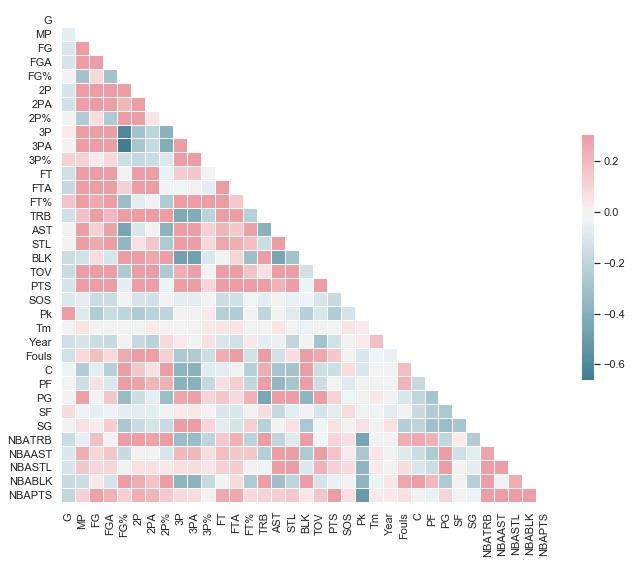

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df3

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .5}))

## Feature Selection

In [16]:
reg.feature_importances_

array([0.0665946 , 0.04169701, 0.03957945, 0.05577689, 0.04679518,
       0.03651841, 0.03204532, 0.03528708, 0.04523591, 0.02941037,
       0.02636631, 0.03110599, 0.04377028, 0.03540575, 0.03792633,
       0.02931179, 0.04014734, 0.03180447, 0.04398602, 0.04309534,
       0.03454864, 0.03201022, 0.03070365, 0.06350103, 0.04737663])

In [48]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model, 12)
reg = rfe.fit(train_x.values, train_y.NBAPTS.values)
print(reg.support_)
print(reg.ranking_)

[ True  True  True False  True  True False  True  True False False False
 False False  True  True  True False False False False  True  True]
[ 1  1  1  3  1  1 10  1  1 11  9  6  7  2  1  1  1  8  4  5 12  1  1]


In [14]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
picks = []
for x in range(0,25):
    if reg.support_[x]:
        picks.append(cols[x])
train_x=train_x[picks]
test_x=test_x[picks]
train_x.head()

,G,MP,FG,FGA,2PA,3P,3PA,AST,STL,TOV,PTS,SOS
Name,,,,,,,,,,,,
Mike Higgins,-0.868495,-3.518929,-2.446230,-2.412762,-2.067621,-1.040380,-1.092230,-1.368845,-1.730732,-1.845803,-2.379129,-2.961529
Ashraf Amaya,0.993155,0.816330,0.686468,0.015798,1.019828,-1.171663,-1.193110,-1.101468,0.097978,-0.164353,0.539585,-1.329206
James Cotton,-1.990961,-2.603292,-2.669994,-2.583788,-2.067621,-1.302946,-1.344430,-1.235157,-0.917972,-1.565562,-2.455937,-3.316382
Eddie Robinson,0.609874,0.891076,-1.924113,-1.523431,-1.179451,-0.909097,-0.840031,0.770171,-0.511592,1.236855,-1.867074,-3.272332
Gilbert Arenas,-0.594723,0.498660,0.910232,0.939335,0.554595,0.666298,0.723604,-0.031960,1.723497,0.956613,0.846818,1.213498


## Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x.values, train_y.NBAPTS.values)
#reg.score(train_x.values, train_y.NBAPTS.values)

reg.coef_

array([-1.62456843e-02, -2.74214622e-01, -6.65075651e-01, -1.59989807e+00,
        5.36920676e-02,  4.99466854e-01,  1.44655955e+00,  1.09555041e-01,
        5.02034803e-01,  1.03231672e+00, -8.90276818e-03, -1.01892030e-01,
        9.09472365e-02,  1.09274437e-02,  1.42430411e-01,  2.19014840e-01,
        6.18370070e-02,  6.25002038e-03, -4.71740912e-02,  3.29784233e-01,
        3.54871107e-02, -4.15721171e-01,  5.77740214e-03,  7.71122265e-02,
        1.97939745e-03, -3.85453070e-02, -6.76158716e-02,  6.41257503e-02,
        3.65283249e-06,  2.84826740e-02])

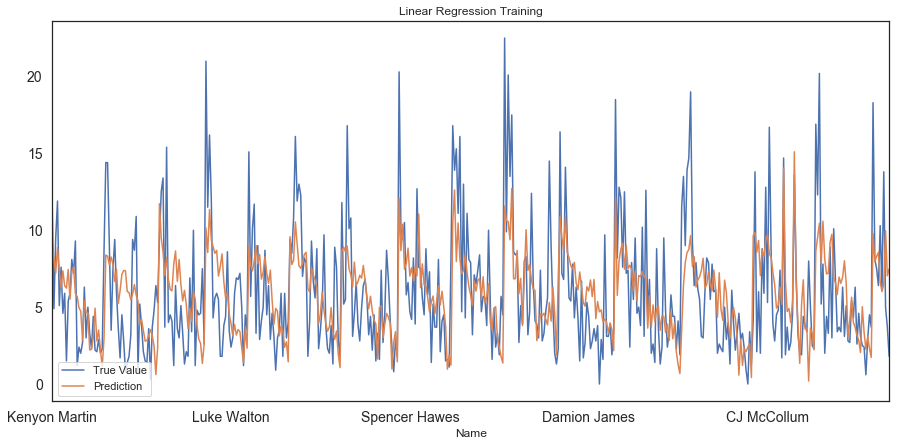

adj train r^2 = 0.3273843370859971
train mse = 10.491811382363613


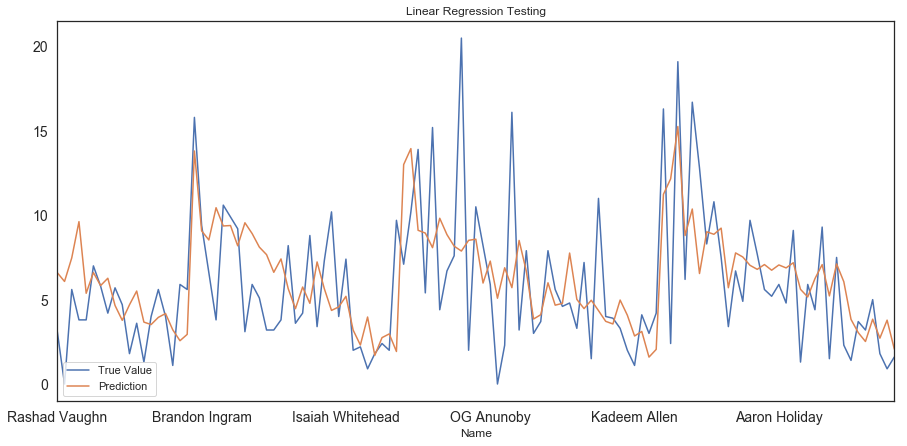

['G', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'SOS', 'Pk', 'Tm', 'Year', 'Fouls', 'C', 'PF', 'PG', 'SF', 'SG']
adj test r^2 = 0.1890502279954055
test mse = 12.43432502199846


In [61]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## Extra Trees

In [62]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=1000,bootstrap=True)
reg.fit(train_x.values, train_y.NBAPTS.values)

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

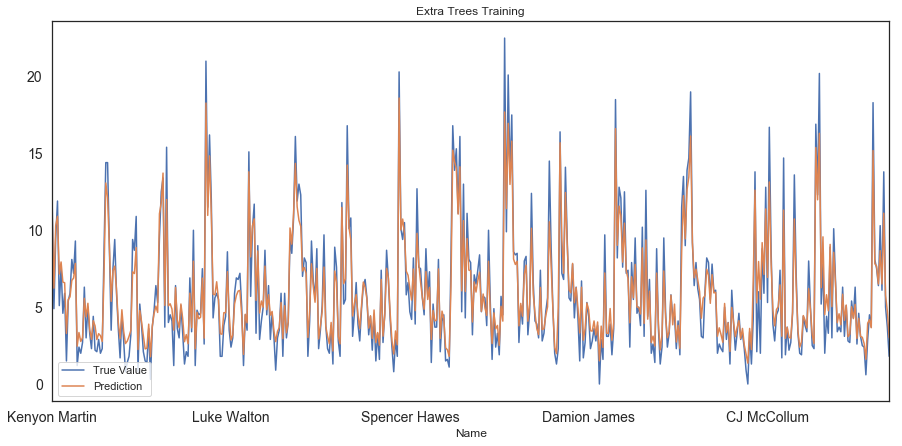

adj train r^2 = 0.9121582984696842
train mse = 1.3702008662260186


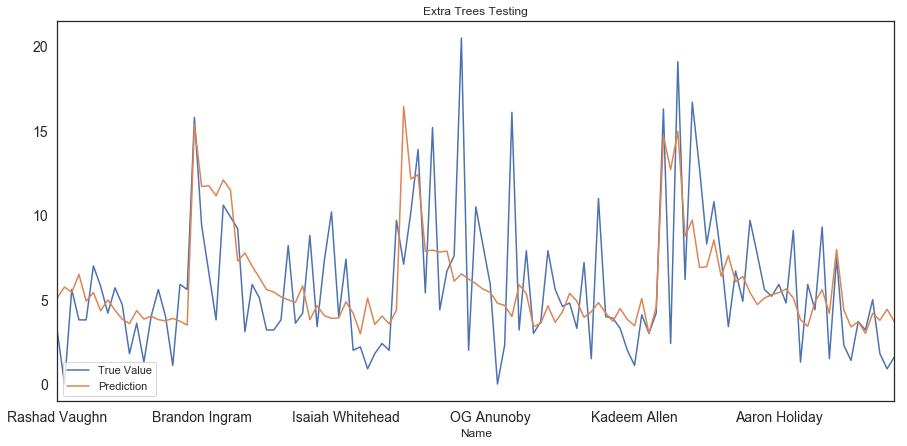

['G', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'SOS', 'Pk', 'Tm', 'Year', 'Fouls', 'C', 'PF', 'PG', 'SF', 'SG']
adj test r^2 = 0.21554806986412878
test mse = 12.028032561538458


In [63]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## Random Forrest

In [64]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.NBAPTS.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

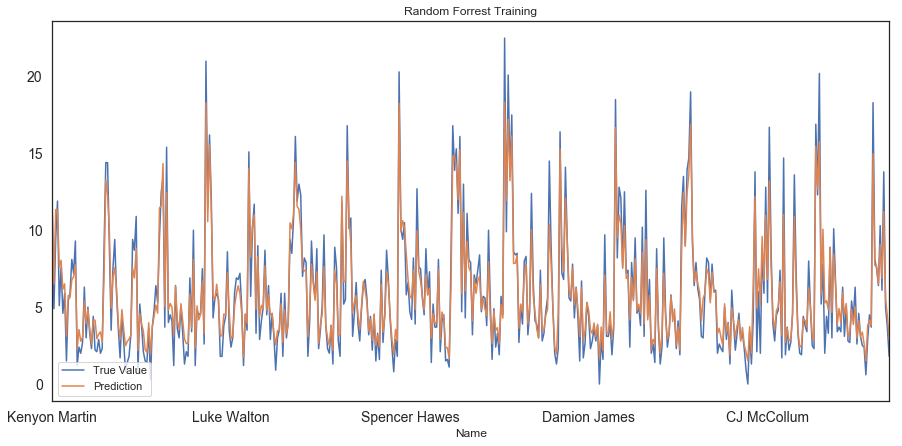

adj train r^2 = 0.9133327421233455
train mse = 1.351881279019197


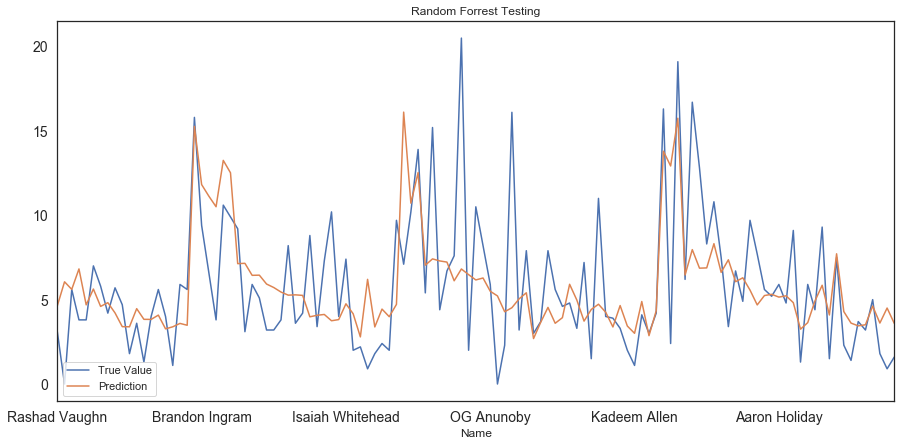

['G', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'SOS', 'Pk', 'Tm', 'Year', 'Fouls', 'C', 'PF', 'PG', 'SF', 'SG']
adj test r^2 = 0.22376030202347863
test mse = 11.90211408008547


In [65]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## XGBoost

In [66]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [67]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=100)
reg.fit(train_x.values, train_y.NBAPTS.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

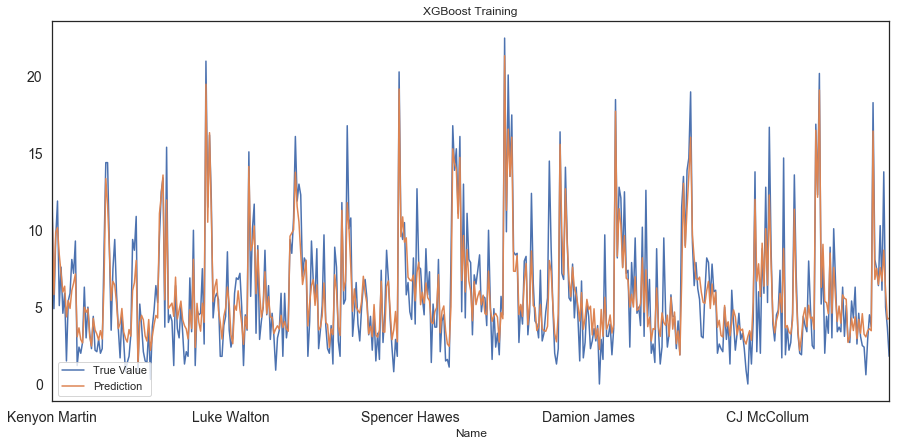

adj train r^2 = 0.8243809675404754
train mse = 2.7393976461028458


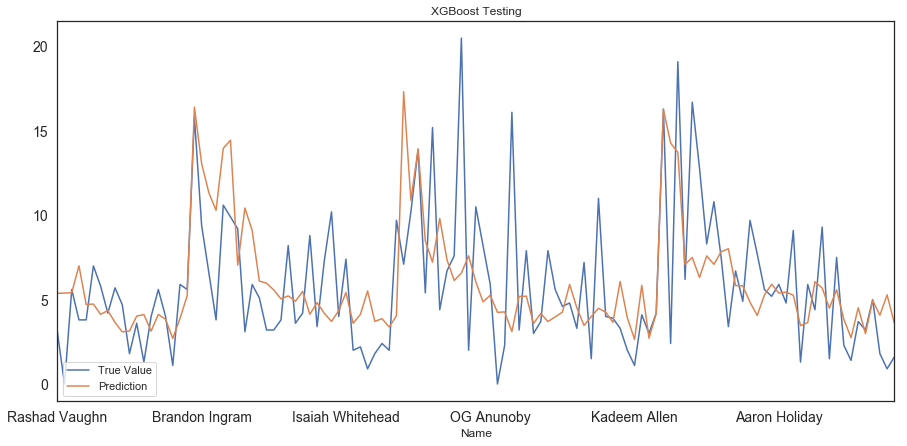

['G', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'SOS', 'Pk', 'Tm', 'Year', 'Fouls', 'C', 'PF', 'PG', 'SF', 'SG']
adj test r^2 = 0.07220884158673291
test mse = 14.22585863453657


In [68]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## Feed Forward Neural Network

In [69]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

Using TensorFlow backend.


In [71]:
K.clear_session()
model = Sequential()
model.add(Dense(128, input_dim=30, activation='relu',kernel_regularizer=regularizers.l2(0.23)))
model.add(Dropout(0.2))
#model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.13)))
#model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=0, min_delta=.000001,restore_best_weights=True)
        
out = model.fit(train_x.values, train_y.NBAPTS.values.ravel(), validation_data=[test_x.values, test_y['NBAPTS'].values.ravel()], epochs=500,verbose=0,shuffle=False, callbacks=[early_stop])

Instructions for updating:
Use tf.cast instead.


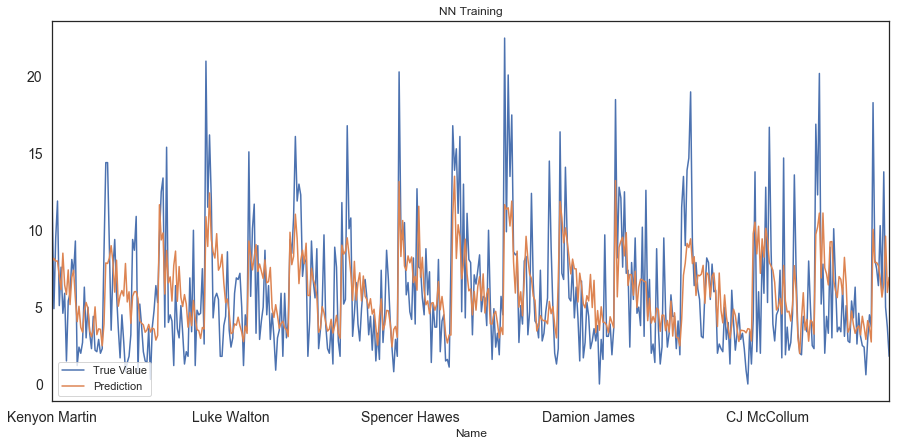

adj train r^2 = 0.3878828519853208
train mse = 9.548123861786245


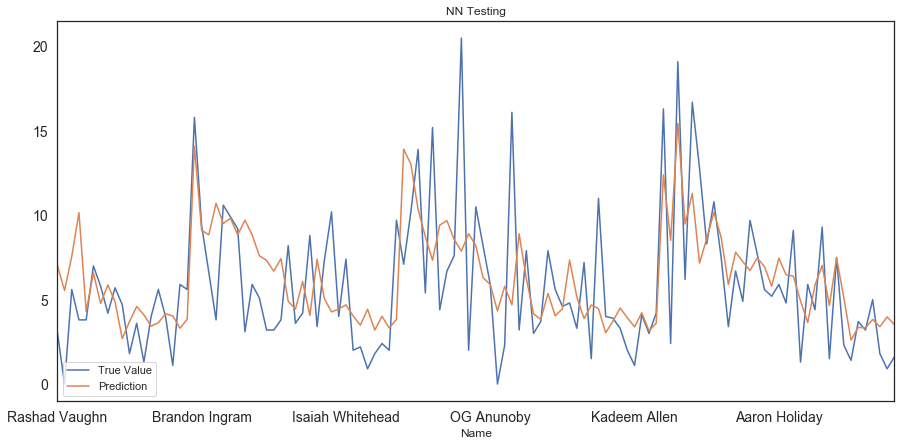

adj test r^2 = 0.23422608074863027
test mse = 11.74164187974787


In [72]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(model.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## LSTM

In [73]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [74]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(600, input_shape=(1, train_x.values.shape[1]), activation='linear',kernel_initializer='lecun_uniform',return_sequences=True))
#model_lstm.add(Dropout(0.4))
model_lstm.add(LSTM(600, activation='relu'))
#model_lstm.add(Dropout(0.4))
#model_lstm.add(LSTM(600, activation='tanh',kernel_initializer='lecun_uniform',return_sequences=True))
#model_lstm.add(Dropout(0.4))
#model_lstm.add(LSTM(600, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.NBAPTS.values.ravel(), validation_data=[X_tst_t, test_y['NBAPTS'].values.ravel()], epochs=40, verbose=0, shuffle=False, callbacks=[early_stop])

Restoring model weights from the end of the best epoch
Epoch 00012: early stopping


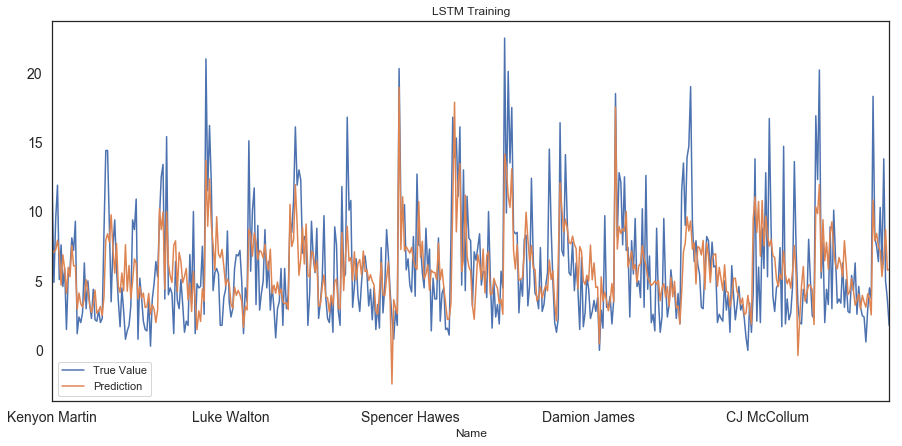

adj train r^2 = 0.4420126581083711
train mse = 8.703778796215616


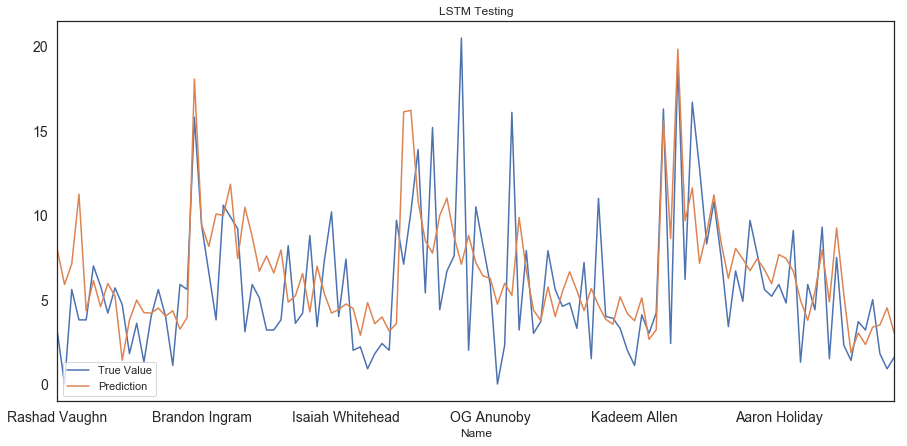

adj test r^2 = 0.16025933385788405
test mse = 12.875776943854184


In [75]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tr_t))
test_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tst_t))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## TPOT

In [76]:
from tpot import TPOTRegressor
from sklearn.metrics.scorer import make_scorer

#my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

tpot = TPOTRegressor(population_size=5, max_time_mins=.5, verbosity=1, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.NBAPTS.values.ravel())

/anaconda3/lib/python3.7/site-packages/deap/tools/_hypervolume/pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)



0.5015125666666667 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: ElasticNetCV(DecisionTreeRegressor(SelectFwe(MaxAbsScaler(RobustScaler(input_matrix)), alpha=0.049), max_depth=2, min_samples_leaf=20, min_samples_split=4), l1_ratio=0.9500000000000001, tol=0.1)


TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=0.5, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=5,
       random_state=None, scoring=None, subsample=1.0,
       template='RandomTree', use_dask=False, verbosity=1,
       warm_start=False)

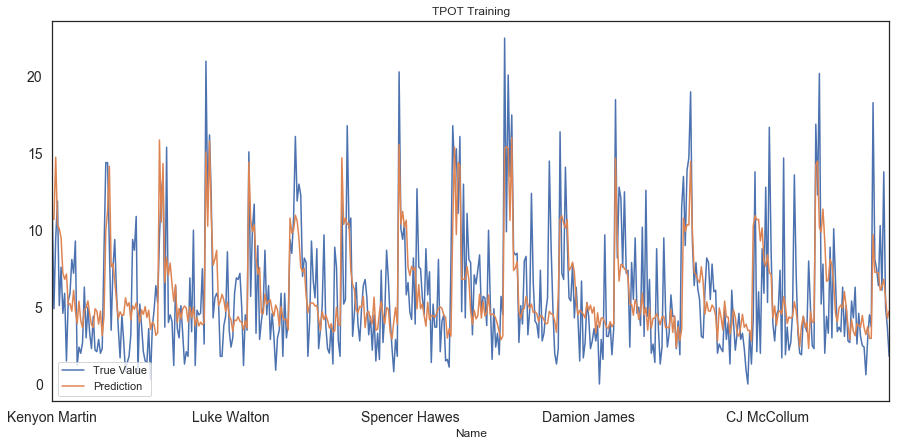

adj train r^2 = 0.44744708731549454
train mse = 8.6190097232432


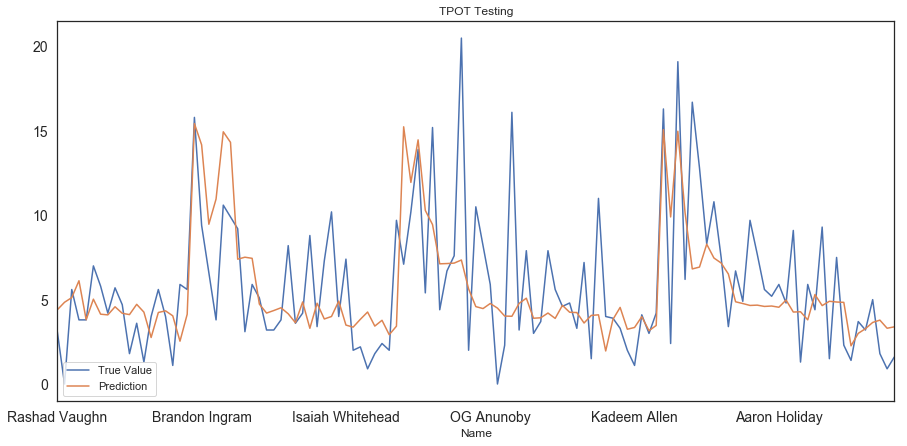

adj test r^2 = 0.1980933004963643
test mse = 12.295667232630732


In [77]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(tpot.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(tpot.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## Differences

In [78]:
test_y2['chip'] = test_y2['NBAPTS'] - test_y2['prediction']
test_y2.sort_values('chip', ascending=True).head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,chip
Name,,,,,,,
Markelle Fultz,0.342318,1.796344,1.034685,0.087965,7.1,15.242255,-8.142255
Jaren Jackson,-0.827763,-0.530516,0.010600,-0.848342,2.4,9.900175,-7.500175
Kris Dunn,-0.189537,0.809191,1.290706,0.712170,3.8,10.962002,-7.162002
Jonathan Isaac,0.661431,-0.389494,1.802749,2.584785,5.4,10.286043,-4.886043
Sam Dekker,-1.146876,-0.883071,-0.501443,-0.848342,0.0,4.843474,-4.843474


In [79]:
test_y2['chip'] = test_y2['NBAPTS'] - test_y2['prediction']
test_y2.sort_values('chip', ascending=False).head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,chip
Name,,,,,,,
Donovan Mitchell,0.661431,1.725833,2.570813,0.087965,20.5,7.347331,13.152669
Kyle Kuzma,2.044254,0.386126,0.266621,0.400068,16.1,4.012952,12.087048
Collin Sexton,0.235947,1.232257,0.010600,-0.536240,16.7,6.819110,9.880890
Dillon Brooks,0.342318,0.245104,1.034685,-0.224137,11.0,4.099363,6.900637
Tyrone Wallace,0.555060,0.809191,1.034685,0.400068,9.7,3.426953,6.273047


## 2019 Predictions

In [80]:
train=df3
test=df4
trains = np.split(train, [30], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [30], axis=1)
test_x=tests[0]
test_y=tests[1]

In [81]:
test_x.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,SOS,Pk,Tm,Year,Fouls,C,PF,PG,SF,SG
Name,,,,,,,,,,,,,,,,,,,,,
Zion Williamson,-1.444047,0.271026,3.310928,1.144716,3.612325,3.483698,1.638049,4.401101,-0.427057,-0.323832,...,1.502125,-1.547340,2.096447,1.555933,-0.253173,-0.345586,1.929198,-0.550368,-0.488527,-0.587157
RJ Barrett,-1.309940,1.412470,2.844621,3.041596,-0.432120,2.163101,2.152053,0.229363,1.146683,1.705776,...,1.502125,-1.423292,-0.379664,1.555933,-0.901240,-0.345586,-0.518350,-0.550368,-0.488527,1.703121
DeAndre Hunter,-0.424830,-0.461221,-0.264092,-0.537423,0.552147,-0.245045,-0.375136,0.459000,-0.164767,-0.273092,...,0.806320,-1.361268,-0.173321,1.555933,-0.685218,-0.345586,-0.518350,-0.550368,2.046969,-0.587157
Darius Garland,-2.195049,-0.202781,0.823957,0.285752,1.053229,-0.089681,-0.417970,1.224456,1.540118,0.893933,...,0.269725,-1.299244,-1.101862,1.555933,-1.765330,-0.345586,-0.518350,1.816967,-0.488527,-0.587157
Coby White,-1.390404,-0.052024,0.513086,0.965765,-0.986889,-0.555774,-0.460803,-0.325593,1.671263,1.908737,...,1.319329,-1.237220,1.064734,1.555933,-0.685218,-0.345586,-0.518350,1.816967,-0.488527,-0.587157


In [83]:
from sklearn.feature_selection import RFE
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
scalars = [sc2, sc3, sc4, sc5, sc6]
test_y2 = test_y.copy(deep=True)
for x in range(5):
    col = cols_at_end[x]
    scalar = scalars[4-x]
    model = LinearRegression()
    rfe = RFE(model, 27)
    reg = rfe.fit(train_x.values, train_y[col].values)
    cols = []
    co = df3.columns
    for colo in co:
        cols = cols + [colo]
    picks = []
    for x in range(0,30):
        if reg.support_[x]:
            picks.append(cols[x])
    train_x3 = train_x[picks]
    test_x3 = test_x[picks]
    K.clear_session()
    model = Sequential()
    model.add(Dense(128, input_dim=27, activation='linear',kernel_regularizer=regularizers.l2(0.23)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.13)))
    model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='Adam', loss='mean_squared_error')
    early_stop = EarlyStopping(monitor='loss', patience=30, verbose=0, min_delta=.000001,restore_best_weights=True)
    out = model.fit(train_x3.values, train_y[col].values.ravel(), validation_data=[test_x3.values, test_y[col].values.ravel()], epochs=500, verbose=0, shuffle=False, callbacks=[early_stop])
    test_y2[col] = scalar.inverse_transform(model.predict(test_x3.values))

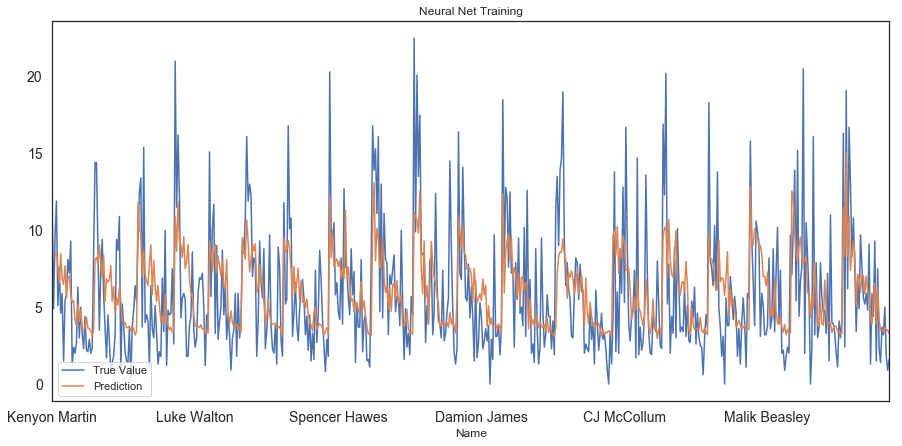

adj train r^2 = 0.34490224344009146
train mse = 10.324359795259996


In [84]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x3.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Neural Net Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Neural Net Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))

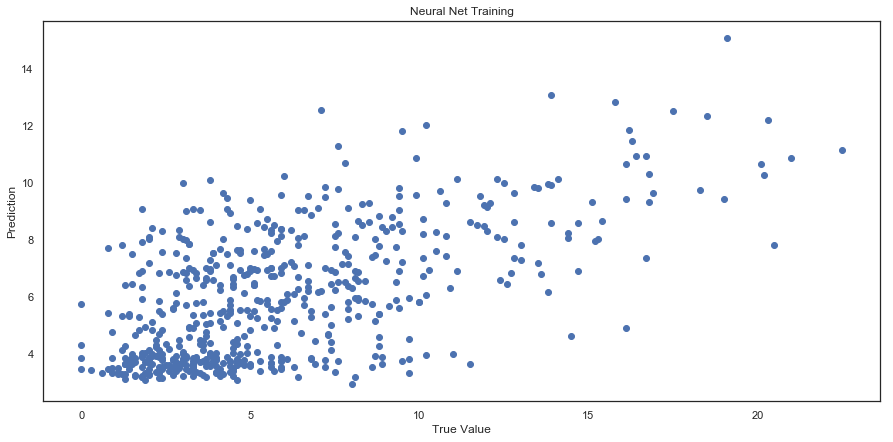

In [85]:
plt.figure(figsize=(15,7))
plt.scatter(train_y2['NBAPTS'],train_y2['prediction'])
plt.xlabel("True Value")
plt.ylabel("Prediction")
plt.title("Neural Net Training")
plt.show()

In [86]:
test_y2['Value'] = 1*test_y2['NBAPTS'] + 1.2*test_y2['NBATRB'] + 1.5*test_y2['NBAAST'] + 3*test_y2['NBASTL'] + 3*test_y2['NBABLK']
test_y2.sort_values('Value', ascending=False)

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Value
Name,,,,,,
Zion Williamson,6.706465,2.639115,1.347648,0.720502,14.624227,32.835106
Ja Morant,3.869308,5.159616,0.994106,0.335782,11.633966,28.006226
RJ Barrett,3.617447,2.579158,0.666690,0.179150,12.200124,22.947317
Coby White,2.455503,3.482892,0.796152,0.191583,10.882679,22.016827
Darius Garland,2.762773,3.190529,0.719079,0.224381,10.556259,21.487761
Bruno Fernando,5.139870,0.993205,0.508685,0.790915,8.620685,20.177134
Bol Bol,4.599672,0.763028,0.420733,0.840365,9.368175,19.815617
Jarrett Culver,3.107154,1.939283,0.755148,0.301215,9.175108,18.981709
DeAndre Hunter,3.583373,1.326686,0.620092,0.360908,8.728292,17.961367


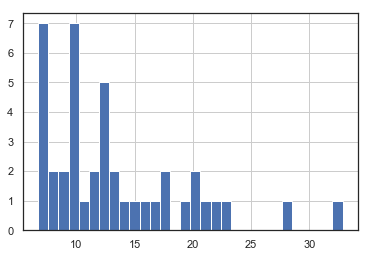

Value Distribution in Draft


In [87]:
hist = test_y2['Value'].hist(bins=30)
plt.show()
print('Value Distribution in Draft')
## This is the result of Neural Networks

In [88]:
test_y2.to_csv('NewRookiePredictions.csv')

In [89]:
test_y2['NBAPTS'].mean()

6.015811920166016